In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('sp').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/25 21:26:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/25 21:26:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
df = spark.read.options(delimiter=';').csv('/Users/alanfayed/Library/CloudStorage/OneDrive-Personal/Documents/da_learning/Student Performance UCI - Project/student+performance/student/student-mat.csv', inferSchema=True,header=True)

In [5]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [6]:
df.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [7]:
df.describe().show()

24/04/25 21:26:54 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+-------+----------+--------+------------------+------------------+------------------+---------+------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|school| sex|               age|address|famsize|Pstatus|              Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|          failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|              Walc|            health|         absences|                G1|                G2|                G3|
+-------+------+----+------------------+-------+-------+-------+------------------+---------------

In [8]:
df.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6|  6|
|    GP|  F| 17|    

In [9]:
print(len(df.columns))

33


In [10]:
from pyspark.sql import functions as F

#define columns to calculate mean for
mean_cols = ['G1','G2','G3']

#define function to calculate mean
find_mean =  F.expr('+'.join(mean_cols))/len(mean_cols)

#calculate mean across specific columns
df_new = df.withColumn('grades_mean', find_mean)

In [11]:
df_new.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|       grades_mean|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [12]:
from pyspark.sql.functions import col, when

In [13]:
df_new = df_new.withColumn("school_num", when(col("school")=='GP', 1).when(col("school")=='MS', 0).otherwise(99))
df_new = df_new.withColumn("sex_num", when(col("sex")=='F', 1).when(col("sex")=='M', 0).otherwise(99))
df_new = df_new.withColumn("address_num", when(col("address")=='U', 1).when(col("address")=='R', 0).otherwise(99))
df_new = df_new.withColumn("famsize_num", when(col("famsize")=='LE3', 1).when(col("famsize")=='GT3', 0).otherwise(99))
df_new = df_new.withColumn("Pstatus_num", when(col("Pstatus")=='T', 1).when(col("Pstatus")=='A', 0).otherwise(99))
df_new = df_new.withColumn("Mjob_num", when(col("Mjob")=='teacher', 1).when(col("Mjob")=='health', 2).when(col("Mjob")=='services', 3).when(col("Mjob")=='at_home', 4).otherwise(99))
df_new = df_new.withColumn("Fjob_num", when(col("Fjob")=='teacher', 1).when(col("Fjob")=='health', 2).when(col("Fjob")=='services', 3).when(col("Fjob")=='at_home', 4).otherwise(99))
df_new = df_new.withColumn("reason_num", when(col("reason")=='home', 1).when(col("reason")=='reputation', 2).when(col("reason")=='course', 3).otherwise(99))
df_new = df_new.withColumn("guardian_num", when(col("guardian")=='mother', 1).when(col("guardian")=='father', 2).otherwise(99))
df_new = df_new.withColumn("schoolsup_num", when(col("schoolsup")=='yes', 1).when(col("schoolsup")=='no', 0).otherwise(99))
df_new = df_new.withColumn("famsup_num", when(col("famsup")=='yes', 1).when(col("famsup")=='no', 0).otherwise(99))
df_new = df_new.withColumn("paid_num", when(col("paid")=='yes', 1).when(col("paid")=='no', 0).otherwise(99))
df_new = df_new.withColumn("activities_num", when(col("activities")=='yes', 1).when(col("activities")=='no', 0).otherwise(99))
df_new = df_new.withColumn("nursery_num", when(col("nursery")=='yes', 1).when(col("nursery")=='no', 0).otherwise(99))
df_new = df_new.withColumn("higher_num", when(col("higher")=='yes', 1).when(col("higher")=='no', 0).otherwise(99))
df_new = df_new.withColumn("internet_num", when(col("internet")=='yes', 1).when(col("internet")=='no', 0).otherwise(99))
df_new = df_new.withColumn("romantic_num", when(col("romantic")=='yes', 1).when(col("romantic")=='no', 0).otherwise(99))

In [14]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [15]:
df_new.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'grades_mean',
 'school_num',
 'sex_num',
 'address_num',
 'famsize_num',
 'Pstatus_num',
 'Mjob_num',
 'Fjob_num',
 'reason_num',
 'guardian_num',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'nursery_num',
 'higher_num',
 'internet_num',
 'romantic_num']

In [16]:
feat_cols = ['school_num',
 'address_num',
 'Medu',
 'Fedu',
 'reason_num',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'nursery_num',
 'higher_num',
 'internet_num',
 'romantic_num',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [17]:
assembler = VectorAssembler(inputCols=feat_cols,outputCol="features")

In [18]:
output = assembler.transform(df_new)

In [19]:
output.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+----------+-------+-----------+-----------+-----------+--------+--------+----------+------------+-------------+----------+--------+--------------+-----------+----------+------------+------------+--------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|       grades_mean|school_num|sex_num|address_num|famsize_num|Pstatus_num|Mjob_num|Fjob_num|reason_num|guardian_num|schoolsup_num|famsup_num|paid_num|activities_num|nursery_num|higher_num|internet_num|romantic_num|            features|
+------+---+---+-------+-------+-------+

In [20]:
from pyspark.ml.classification import RandomForestClassifier,DecisionTreeClassifier

In [21]:
rfc = DecisionTreeClassifier(labelCol='grades_mean',featuresCol='features')

In [22]:
final_data = output.select('features','grades_mean')
final_data.show()

+--------------------+------------------+
|            features|       grades_mean|
+--------------------+------------------+
|[1.0,1.0,4.0,4.0,...| 5.666666666666667|
|[1.0,1.0,1.0,1.0,...| 5.333333333333333|
|[1.0,1.0,1.0,1.0,...| 8.333333333333334|
|[1.0,1.0,4.0,2.0,...|14.666666666666666|
|[1.0,1.0,3.0,3.0,...| 8.666666666666666|
|[1.0,1.0,4.0,3.0,...|              15.0|
|[1.0,1.0,2.0,2.0,...|11.666666666666666|
|[1.0,1.0,4.0,4.0,...| 5.666666666666667|
|[1.0,1.0,3.0,2.0,...|17.666666666666668|
|[1.0,1.0,3.0,4.0,...|14.666666666666666|
|[1.0,1.0,4.0,4.0,...|               9.0|
|[1.0,1.0,2.0,1.0,...|11.333333333333334|
|[1.0,1.0,4.0,4.0,...|              14.0|
|[1.0,1.0,4.0,3.0,...|10.333333333333334|
|[1.0,1.0,2.0,2.0,...|15.333333333333334|
|[1.0,1.0,4.0,4.0,...|              14.0|
|[1.0,1.0,4.0,4.0,...|13.666666666666666|
|[1.0,1.0,3.0,3.0,...| 9.333333333333334|
|[1.0,1.0,3.0,2.0,...| 5.333333333333333|
|[1.0,1.0,4.0,3.0,...| 9.333333333333334|
+--------------------+------------

In [23]:
#rfc_model = rfc.fit(final_data)

In [24]:
from pyspark.ml.clustering import KMeans

In [25]:
from pyspark.ml.feature import StandardScaler

In [26]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [27]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [28]:
# Normalize each feature to have unit standard deviation.
cluster_final_data = scalerModel.transform(final_data)

In [29]:
kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)
kmeans4 = KMeans(featuresCol='scaledFeatures',k=4)

In [30]:
model_k3 = kmeans3.fit(cluster_final_data)
model_k2 = kmeans2.fit(cluster_final_data)
model_k4 = kmeans4.fit(cluster_final_data)

24/04/25 21:27:07 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


In [31]:
predictions4 = model_k4.transform(cluster_final_data)
predictions3 = model_k3.transform(cluster_final_data)
predictions2 = model_k2.transform(cluster_final_data)

In [32]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [33]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette4 = evaluator.evaluate(predictions3)
print("Silhouette4 with squared euclidean distance = " + str(silhouette4))
centers4 = model_k4.clusterCenters()
print("Cluster Centers (k=4): ")
for center in centers4:
    print(center)

print("-----------------------------------")

silhouette3 = evaluator.evaluate(predictions3)
print("Silhouette3 with squared euclidean distance = " + str(silhouette3))
centers3 = model_k3.clusterCenters()
print("Cluster Centers (k=3): ")
for center in centers3:
    print(center)

print("-----------------------------------")

silhouette2 = evaluator.evaluate(predictions3)
print("Silhouette2 with squared euclidean distance = " + str(silhouette2))
centers2 = model_k2.clusterCenters()
print("Cluster Centers (k=2): ")
for center in centers2:
    print(center)

Silhouette4 with squared euclidean distance = -0.13188836640976676
Cluster Centers (k=4): 
[3.0232965  1.94793774 2.42928192 2.19082593 0.19999726 2.01546598
 2.77165769 0.28258543 0.58272953 2.03532956 1.22011477 0.88307688
 1.93590479 4.55528997 2.17277962 0.56768113 2.98165387 2.39532826
 1.25282376 1.27159367 2.49137572 0.50705017]
[2.81701614 2.01154387 3.279767   3.08941654 0.53354836 1.84330541
 2.29232249 0.29455703 0.25529103 1.64014879 1.24086502 1.29380069
 2.19095256 4.51190625 2.62618108 0.86708361 3.60410132 3.39623328
 2.15978449 2.38114355 2.65786455 1.06982412]
[2.81223343 2.06463447 2.3376794  2.13433145 0.22325119 1.86532817
 2.52404401 0.30364574 0.28823181 0.         0.45262322 1.20296459
 2.02148242 4.55528997 2.159012   0.72853236 3.03571259 2.54986556
 1.24337641 1.31914685 2.38982417 0.58848196]
[1.89978966 1.09836804 1.61017199 1.52638864 0.85063794 2.96456274
 1.69644944 1.34471686 0.30288767 0.72972721 0.37371554 0.54177098
 1.55127587 3.08833218 1.76965797 

In [34]:
output.printSchema()

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [35]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType


In [36]:
# Define a function to assign labels based on grades
def assign_label(grades_mean):
    if grades_mean >= 0 and grades_mean <= 7:
        return 3
    elif grades_mean >= 15 and grades_mean <= 20:
        return 1
    else:
        return 2




In [37]:
# Create a UDF from the assign_label function
assign_label_udf = udf(assign_label, IntegerType())

# Apply the UDF to the DataFrame to create a new column "label"
output2 = output.withColumn("label", assign_label_udf(output["grades_mean"]))

In [38]:
output2.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'grades_mean',
 'school_num',
 'sex_num',
 'address_num',
 'famsize_num',
 'Pstatus_num',
 'Mjob_num',
 'Fjob_num',
 'reason_num',
 'guardian_num',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'nursery_num',
 'higher_num',
 'internet_num',
 'romantic_num',
 'features',
 'label']

In [39]:
rfc2 = DecisionTreeClassifier(labelCol='label',featuresCol='features')


In [40]:
final_data2 = output2.select('features','label')


In [41]:
final_data2.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)



In [42]:
rfc_model2 = rfc2.fit(final_data2)

In [43]:
rfc_model2.featureImportances

SparseVector(22, {2: 0.1035, 3: 0.0773, 4: 0.0727, 7: 0.1801, 8: 0.0789, 9: 0.0224, 10: 0.0465, 11: 0.0359, 13: 0.0414, 16: 0.0495, 17: 0.0255, 19: 0.0287, 21: 0.2375})

In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
from pyspark.ml.classification import RandomForestClassifier
import matplotlib.pyplot as plt


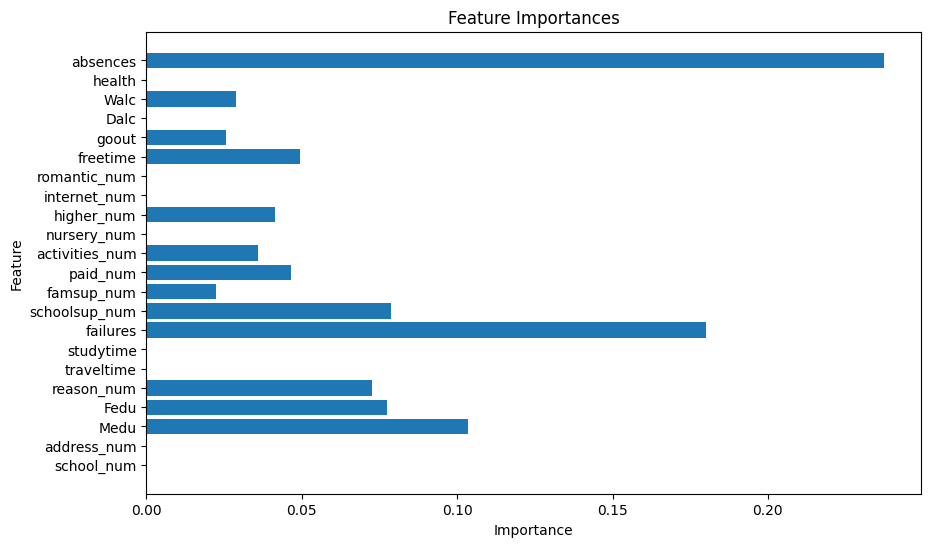

In [46]:
# Get feature importances
importances = rfc_model2.featureImportances

# Get feature names
feature_names = ['school_num',
 'address_num',
 'Medu',
 'Fedu',
 'reason_num',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'nursery_num',
 'higher_num',
 'internet_num',
 'romantic_num',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [47]:
final_data2_new = rfc_model2.transform(final_data2)

In [48]:
final_data2_new.show()

+--------------------+-----+-------------------+--------------------+----------+
|            features|label|      rawPrediction|         probability|prediction|
+--------------------+-----+-------------------+--------------------+----------+
|[1.0,1.0,4.0,4.0,...|    3| [0.0,0.0,11.0,2.0]|[0.0,0.0,0.846153...|       2.0|
|[1.0,1.0,1.0,1.0,...|    3| [0.0,7.0,90.0,5.0]|[0.0,0.0686274509...|       2.0|
|[1.0,1.0,1.0,1.0,...|    2| [0.0,7.0,90.0,5.0]|[0.0,0.0686274509...|       2.0|
|[1.0,1.0,4.0,2.0,...|    2| [0.0,7.0,60.0,7.0]|[0.0,0.0945945945...|       2.0|
|[1.0,1.0,3.0,3.0,...|    2| [0.0,7.0,60.0,7.0]|[0.0,0.0945945945...|       2.0|
|[1.0,1.0,4.0,3.0,...|    1| [0.0,7.0,60.0,7.0]|[0.0,0.0945945945...|       2.0|
|[1.0,1.0,2.0,2.0,...|    2| [0.0,8.0,36.0,6.0]|[0.0,0.16,0.72,0.12]|       2.0|
|[1.0,1.0,4.0,4.0,...|    3| [0.0,0.0,11.0,2.0]|[0.0,0.0,0.846153...|       2.0|
|[1.0,1.0,3.0,2.0,...|    1| [0.0,8.0,36.0,6.0]|[0.0,0.16,0.72,0.12]|       2.0|
|[1.0,1.0,3.0,4.0,...|    2|

In [49]:
import pandas as pd
from pyspark.sql.functions import col

# Convert predictions DataFrame to pandas DataFrame
predictions_pd = final_data2_new.select("label", "prediction").toPandas()

# Calculate confusion matrix using crosstab
conf_matrix_pd = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'])

# Convert index and columns to string for better visual representation
conf_matrix_pd.index = conf_matrix_pd.index.astype(str)
conf_matrix_pd.columns = conf_matrix_pd.columns.astype(str)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_pd)


Confusion Matrix:
prediction  1.0  2.0  3.0
label                    
1            18   37    1
2            10  257    4
3             2   28   38


In [50]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassificationModel

In [51]:
train_label,test_label = final_data2.randomSplit([0.7,0.3])

In [52]:
from pyspark.ml.classification import LogisticRegression

In [53]:
lr_student = LogisticRegression(labelCol='label')

In [54]:
fitted_model = lr_student.fit(train_label)

In [55]:
training_sum = fitted_model.summary

In [56]:
training_sum.predictions.describe().show()

+-------+------------------+------------------+
|summary|             label|        prediction|
+-------+------------------+------------------+
|  count|               284|               284|
|   mean|2.0211267605633805|1.9929577464788732|
| stddev|0.5635364089642639|0.3663684617955499|
|    min|               1.0|               1.0|
|    max|               3.0|               3.0|
+-------+------------------+------------------+



In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [58]:
pred_and_labels = fitted_model.evaluate(test_label)

In [59]:
pred_and_labels.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(22,[0,2,3,4,5,6,...|    1|[-61.086145922739...|[7.69213321036313...|       2.0|
|[0.0,0.0,1.0,1.0,...|    2|[-38.764659537345...|[3.30955074604168...|       2.0|
|[0.0,0.0,1.0,2.0,...|    3|[-61.619161487182...|[4.43699280474240...|       2.0|
|[0.0,0.0,3.0,2.0,...|    2|[-27.465025319264...|[7.33917036027864...|       2.0|
|[0.0,1.0,3.0,1.0,...|    2|[-75.761853783887...|[4.30462414640157...|       2.0|
|[0.0,1.0,3.0,3.0,...|    2|[-78.254099012785...|[9.90038956164954...|       3.0|
|[1.0,0.0,1.0,2.0,...|    2|[-41.628662583011...|[4.37543788202878...|       2.0|
|[1.0,0.0,2.0,1.0,...|    3|[-37.075178582860...|[9.02037738623478...|       3.0|
|[1.0,0.0,2.0,1.0,...|    3|[-2.8361630298303...|[1.73781768904776...|       2.0|
|[1.0,0.0,2.0,2.

In [60]:
pred_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='label')

In [61]:
auc = pred_eval.evaluate(pred_and_labels.predictions)

In [62]:
auc

1.0

In [63]:
output2.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+----------+-------+-----------+-----------+-----------+--------+--------+----------+------------+-------------+----------+--------+--------------+-----------+----------+------------+------------+--------------------+-----+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|       grades_mean|school_num|sex_num|address_num|famsize_num|Pstatus_num|Mjob_num|Fjob_num|reason_num|guardian_num|schoolsup_num|famsup_num|paid_num|activities_num|nursery_num|higher_num|internet_num|romantic_num|            features|label|
+------+---+---+-------+----

In [64]:
newdf = output2.select('Medu','Fedu','reason_num','failures','schoolsup_num','famsup_num','paid_num','activities_num','higher_num', 'freetime', 'goout', 'Walc', 'absences')

In [65]:
newdf.columns

['Medu',
 'Fedu',
 'reason_num',
 'failures',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'higher_num',
 'freetime',
 'goout',
 'Walc',
 'absences']

In [66]:
dffeat_cols = ['Medu',
 'Fedu',
 'reason_num',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'freetime',
 'goout',
 'Walc',
 'absences']

In [67]:
assembler2 = VectorAssembler(inputCols=dffeat_cols,outputCol="features")

In [68]:
finaldf = assembler2.transform(newdf)

In [69]:
finaldf.columns

['Medu',
 'Fedu',
 'reason_num',
 'failures',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'higher_num',
 'freetime',
 'goout',
 'Walc',
 'absences',
 'features']

In [70]:
finaldf.show()

+----+----+----------+--------+-------------+----------+--------+--------------+----------+--------+-----+----+--------+--------------------+
|Medu|Fedu|reason_num|failures|schoolsup_num|famsup_num|paid_num|activities_num|higher_num|freetime|goout|Walc|absences|            features|
+----+----+----------+--------+-------------+----------+--------+--------------+----------+--------+-----+----+--------+--------------------+
|   4|   4|         3|       0|            1|         0|       0|             0|         1|       3|    4|   1|       6|[4.0,4.0,3.0,1.0,...|
|   1|   1|         3|       0|            0|         1|       0|             0|         1|       3|    3|   1|       4|[1.0,1.0,3.0,0.0,...|
|   1|   1|        99|       3|            1|         0|       1|             0|         1|       3|    2|   3|      10|[1.0,1.0,99.0,1.0...|
|   4|   2|         1|       0|            0|         1|       1|             1|         1|       2|    2|   1|       2|[4.0,2.0,1.0,0.0,...|
|   3|

In [71]:
rfcfailure = DecisionTreeClassifier(labelCol='failures',featuresCol='features')

In [72]:
rfcdf = finaldf.select('failures','features')

In [73]:
rfcfl_model = rfcfailure.fit(rfcdf)

In [74]:
rfcfl_model.featureImportances

SparseVector(11, {0: 0.1058, 1: 0.2467, 2: 0.0393, 3: 0.0687, 6: 0.0343, 7: 0.0786, 8: 0.1131, 9: 0.1348, 10: 0.1787})

In [75]:
rfc_model2.featureImportances

SparseVector(22, {2: 0.1035, 3: 0.0773, 4: 0.0727, 7: 0.1801, 8: 0.0789, 9: 0.0224, 10: 0.0465, 11: 0.0359, 13: 0.0414, 16: 0.0495, 17: 0.0255, 19: 0.0287, 21: 0.2375})

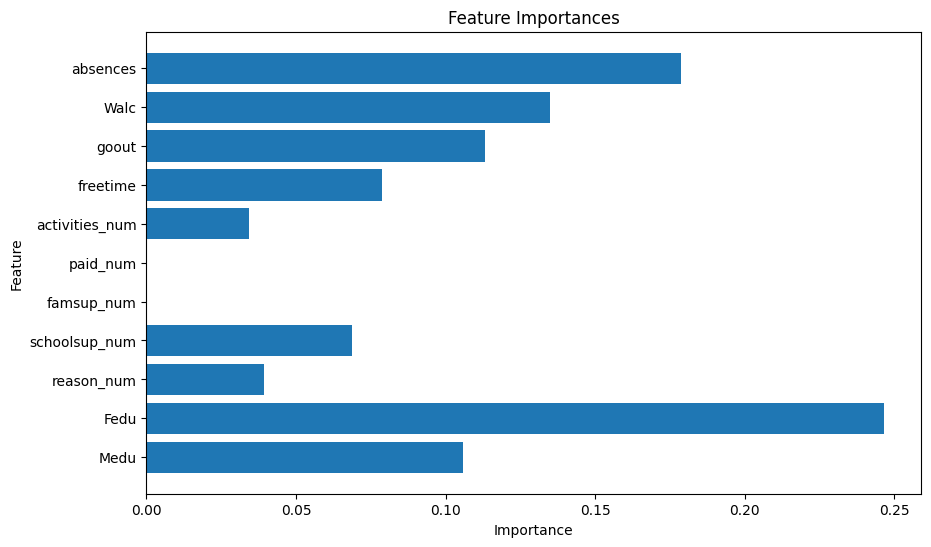

In [76]:
# Get feature importances
importancesfl = rfcfl_model.featureImportances

# Get feature names
feature_namesfl = ['Medu',
 'Fedu',
 'reason_num',
 'schoolsup_num',
 'famsup_num',
 'paid_num',
 'activities_num',
 'freetime',
 'goout',
 'Walc',
 'absences']

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancesfl)), importancesfl, align='center')
plt.yticks(range(len(importancesfl)), feature_namesfl)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [77]:
finaldf.orderBy(col('failures').desc()).show()

+----+----+----------+--------+-------------+----------+--------+--------------+----------+--------+-----+----+--------+--------------------+
|Medu|Fedu|reason_num|failures|schoolsup_num|famsup_num|paid_num|activities_num|higher_num|freetime|goout|Walc|absences|            features|
+----+----+----------+--------+-------------+----------+--------+--------------+----------+--------+-----+----+--------+--------------------+
|   1|   1|        99|       3|            1|         0|       1|             0|         1|       3|    2|   3|      10|[1.0,1.0,99.0,1.0...|
|   3|   2|         3|       3|            0|         1|       0|             1|         1|       5|    5|   4|      16|[3.0,2.0,3.0,0.0,...|
|   3|   2|         1|       3|            0|         1|       0|             0|         1|       3|    2|   1|       0|[3.0,2.0,1.0,0.0,...|
|   2|   1|         1|       3|            1|         1|       0|             1|         0|       5|    1|   1|       2|[2.0,1.0,1.0,1.0,...|
|   0|

In [78]:
finaldf_new = rfcfl_model.transform(rfcdf)

In [79]:
finaldf_new.show()

+--------+--------------------+--------------------+--------------------+----------+
|failures|            features|       rawPrediction|         probability|prediction|
+--------+--------------------+--------------------+--------------------+----------+
|       0|[4.0,4.0,3.0,1.0,...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|[1.0,1.0,3.0,0.0,...| [46.0,12.0,3.0,5.0]|[0.69696969696969...|       0.0|
|       3|[1.0,1.0,99.0,1.0...| [46.0,12.0,3.0,5.0]|[0.69696969696969...|       0.0|
|       0|[4.0,2.0,1.0,0.0,...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|[3.0,3.0,1.0,0.0,...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|[4.0,3.0,2.0,0.0,...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|(11,[0,1,2,7,8,9]...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|[4.0,4.0,1.0,1.0,...|[246.0,22.0,12.0,...|[0.86925795053003...|       0.0|
|       0|[3.0,2.0,1.0,0.0,...|[246.0,22.0,12.0,...|[0.8692579505

In [80]:
# Convert predictions DataFrame to pandas DataFrame
predictions_pddf = finaldf_new.select("failures", "prediction").toPandas()

# Calculate confusion matrix using crosstab
conf_matrix_pddf = pd.crosstab(predictions_pddf['failures'], predictions_pddf['prediction'])

# Convert index and columns to string for better visual representation
conf_matrix_pddf.index = conf_matrix_pddf.index.astype(str)
conf_matrix_pddf.columns = conf_matrix_pddf.columns.astype(str)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_pddf)

Confusion Matrix:
prediction  0.0  1.0  2.0  3.0
failures                      
0           312    0    0    0
1            39   11    0    0
2            15    0    2    0
3             8    1    0    7


In [86]:
assd = output2.drop('features')
assd.write.csv('/Users/alanfayed/Library/CloudStorage/OneDrive-Personal/Downloads/new_data.csv', header=True)